<a href="https://colab.research.google.com/github/007tickooayush/ML-Regression-TED-talks-Project/blob/master/Ayush_Tickoo_ML_Capstone_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   - TED Talk Views Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Contributor       - Ayush Tickoo**


# **Project Summary -**

In this project, the objective is to predict the number of views a TED talk session can have using the dataset provided, by applying specific methods to draw out heuristics after doing exploratory data analysis on the dataset. Before beginning with the data analysis, data wrangling will be done to get the data in a format ready for analysis. Hence after completing the wrangling and analysis statistically and visually, we will continue doing transformations on the dataset, if required. Transformations, such as encoding, normalization, and regularization of the dataset. After the data is ready is ready to be entered in to a model, it will be split into a proportion and a portion of it will be kept for testing the model chosen. Hence, multiple models will be applied to get acknowleged about the model that fits the dataset best for predictions, which will also be followed by paramter tuning, if required to get the highest accuracy possible.

# **GitHub Link -**

https://github.com/007tickooayush/ML-Regression-TED-talks-Project

# **Problem Statement**


TED is all about spreading powerful ideas on any topic. This dataset contains over 4,005 TED talks, including transcripts in multiple languages.

Founded in 1984 by Richard Salman, the nonprofit organization dedicated to bringing together experts in the fields of technology, entertainment, and design, TED talks have become a mecca for ideas from nearly every industry. In 2015, TED and its sister TEDx chapters published over 2,000 talks that are freely available to the general public, with a list of speakers including Al Gore, Jimmy Wales, Shah Rukh Khan and Bill Gates.

TED Talks has been using “ideas worth spreading” as a platform for years.
In the digital world we live in today, TED is a great platform to spread your ideas. But how do you know if your ideas will be heard or appreciated.

The main goal is to build a predictive model that can help predict the number of views of videos uploaded to the TEDx website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## **About the dataset**

### Import Libraries

In [2]:
# Import Libraries
from numpy import math
import numpy as np
from numpy import nan
import pandas as pd
import missingno as msno

from datetime import datetime

from sklearn.metrics import r2_score,log_loss
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge,Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# to reduce the deprecated method and other unnecessary warning messages from the console
import warnings
warnings.filterwarnings('ignore')

Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

Mounted at /content/drive


### Dataset Loading

In [5]:
# Load Dataset
dir_path = '/content/drive/MyDrive/Colab Notebooks/ALMABETTER_DSC/1_1.2_Regression_Project/Ayush Tickoo ML Regression Project [Capstone Project]/data/'
df = pd.read_csv(dir_path+'data_ted_talks.csv')

In [6]:
# create a backup of the datafame
df_bkup = df.copy()

### Dataset First View

In [7]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [9]:
# Description of non-numerical variables in dataset 
df.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [10]:
# Descrption of numerical columns 
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [11]:
# Dimensions of Dataset
df.shape

(4005, 19)

In [12]:
# First entry of dataset
df.iloc[0]

talk_id                                                           1
title                                   Averting the climate crisis
speaker_1                                                   Al Gore
all_speakers                                         {0: 'Al Gore'}
occupations                               {0: ['climate advocate']}
about_speakers    {0: 'Nobel Laureate Al Gore focused the world’...
views                                                       3523392
recorded_date                                            2006-02-25
published_date                                           2006-06-27
event                                                       TED2006
native_lang                                                      en
available_lang    ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...
comments                                                      272.0
duration                                                        977
topics            ['alternative energy', 'cars',

In [13]:
# Last entry of dataset
df.iloc[-1]

talk_id                                                       62794
title                          The most important anus in the ocean
speaker_1                                              Cella Wright
all_speakers                                    {0: 'Cella Wright'}
occupations                                                     NaN
about_speakers                                                  NaN
views                                                             0
recorded_date                                            2020-04-30
published_date                                           2020-04-30
event                                                        TED-Ed
native_lang                                                      en
available_lang                                               ['en']
comments                                                        NaN
duration                                                        281
topics            ['animals', 'TED-Ed', 'animati

### Dataset Information

In [14]:
# Columns of the dataset
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
print('Count of Duplicates in dataset: ',(df.duplicated()).sum())

Count of Duplicates in dataset:  0


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

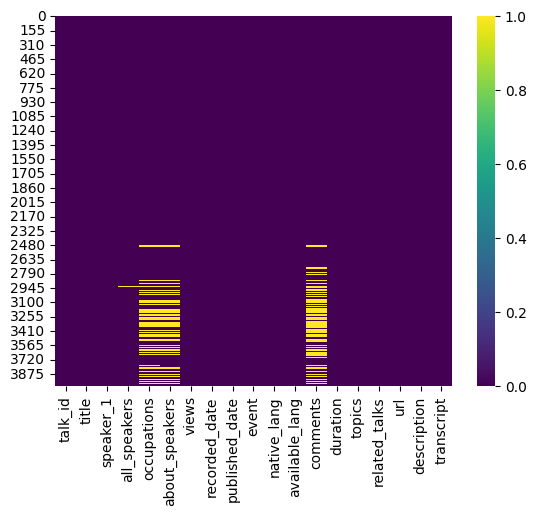

In [17]:
# Visualizing the missing values in form of heatmap
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

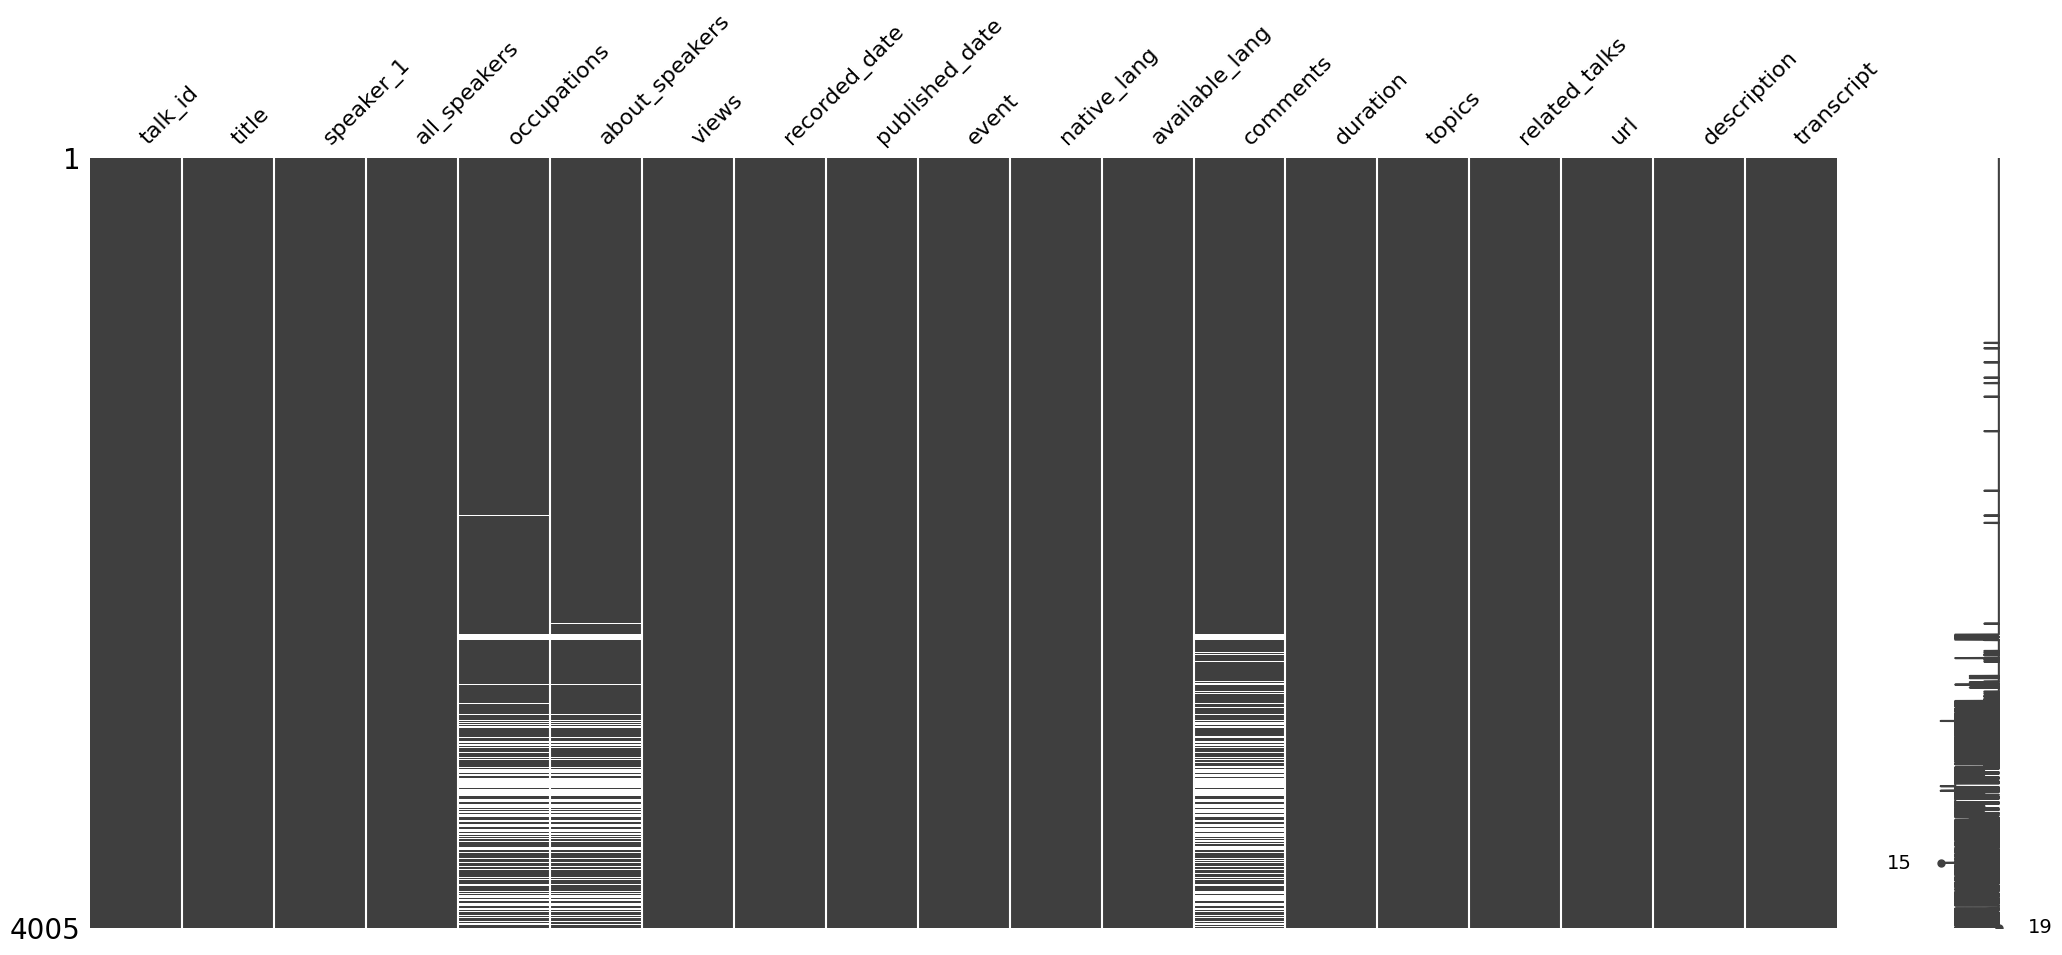

In [18]:
# Printing the matrix of missing/NaN values of columns
msno.matrix(df)
plt.show()

## **Understanding the Variables**

### Variables Description 


- **talk_id** - identification number provided by TED (int)
- **title** - Title of TED talk (string) 
- **speaker_1** - First speaker in TED speaker list (string)
- **all_speakers** - All the speakers in the TED session (dictionary) <br>`[FORMAT - {'speaker' : 'speaker_name'}`<br>`(speaker - speaker number of session, speaker_name - name of speaker)]`
- **occupations** - Occupation of the speakers of the session (dictionary) <br> `[FORMAT - {'speaker' : 'speaker_occupation'}`<br>`(speaker - speaker number of session, speaker_occupation - occupation of speaker)]`
- **about_speakers** - Descriptive text about speakers (dictionary) <br>`[FORMAT - {'speaker' : 'speaker_description'}`<br>`(speaker - speaker number of session, speaker_description - About the speaker)]`
- **views**{<u>**Dependent Variable**</u>} - Number of views (int) 
- **recorded_date** - Date of the TED session (string)
- **published_date** - Date of TED session publishment (string) 
- **event** - Event of the TED session (string)
- **native_lang** - Native language (string)
- **available_lang** - All the available languages (list)
- **comments** - Number of comments received (dictionary)<br>`[FORMAT - {'talk_id' : 'title'}`<br>`(talk_id - column 1 of dataset, title - column 2 of dataset)]`
- **duration** - Duration of TED talk session (in seconds) (int)
- **topics** - Topic of the TED session and tags (list)
- **related_talks** - Related TED talk sessions (dictionary)<br>`[FORMAT - {'talk_id' : 'title'}`<br>`(talk_id - column 1 of dataset, title - column 2 of dataset)]`
- **url** - URL link of the TED session (string)
- **description** - Information about the TED talk session (string) 
- **transcript** - Complete transcript of the TED session (string)

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
unique_vals = pd.DataFrame(df.nunique(),columns=['unique_count'])
unique_vals['total'] = len(df)

unique_vals

,unique_count,total
talk_id,4005,4005
title,4005,4005
speaker_1,3274,4005
all_speakers,3306,4005
occupations,2049,4005
about_speakers,2977,4005
views,3996,4005
recorded_date,1334,4005
published_date,2962,4005
event,459,4005


## ***Data Wrangling and Data pre-processing***

### Data Wrangling Code

`Making the dataset analysis ready.`

In [20]:
# Numerical columns
print('Numerical Columns:',[i for i in df.describe().columns.to_list()])


Numerical Columns: ['talk_id', 'views', 'comments', 'duration']


In [21]:
# Non-numerical columns
print('Non-numerical Columns:',[i for i in df.describe(include='object').columns.to_list()])

Non-numerical Columns: ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']


#### Wrangling views

In [22]:
max_view_power = len(str(int(df['views'].max())))
for i in range(1,max_view_power):
  print('Views less than',10**i,' '*(max_view_power - i),': ',len(df.loc[(df['views'] <= 10**i),:]))

Views less than 10         :  6
Views less than 100        :  6
Views less than 1000       :  6
Views less than 10000      :  6
Views less than 100000     :  52
Views less than 1000000    :  1229
Views less than 10000000   :  3916


In [23]:
len(df.loc[(df['views'] <= 1000),:])

6

Here we have these 6 values that can be presented as outliers as the views are even lesser than 1000, far lower than the average, for that session.
We can see that some of the values for views variables are 0 or less than 1000, hence are outliers. so we remove these values considreing of them being in a neglegible percentage.

In [24]:
df.drop(df.loc[(df['views'] < 1000) | (df['views'] <= 0)].index,inplace = True)

#### Wrangling comments

In [25]:
len(df.loc[(df['comments'] == 0) | (df['comments'].isnull()),:])

651

Treating the null values and outliers in comments and reshaping the dataset accorrdingly.

In [26]:
df['comments'].fillna(df['comments'].median(),axis=0,inplace = True)

In [27]:
df.drop(df.loc[df['comments'] == 0].index,inplace = True)

#### Wrangling dates, published_date and recorded_date

In [28]:
# transforming the recorded_date and published date to datetime data type 
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

In [29]:
df['recorded_date'].dtype

dtype('<M8[ns]')

In [30]:
df['published_date'].dtype

dtype('<M8[ns]')

#### Wrangling speaker_1, all_speakers and about_speakers

In [31]:
df['speaker_1'].nunique()

3271

In [32]:
# get the null values in all_speakers
df.loc[df['all_speakers'].isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2927,23418,How prefab homes can transform affordable housing,Antón García-Abril,NaN,NaN,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,"['en', 'es']",89.0,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",https://www.ted.com/talks/anton_garcia_abril_h...,When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...
3266,36384,Why we need to stop obsessing over World War II,Keith Lowe,NaN,NaN,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,"['en', 'pt', 'sr']",89.0,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",https://www.ted.com/talks/keith_lowe_why_we_ne...,Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...
3290,36844,Why talent carries you further than fame,Maisie Williams,NaN,NaN,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,"['ar', 'de', 'el', 'en', 'es', 'fr', 'hu', 'pt...",89.0,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,https://www.ted.com/talks/maisie_williams_why_...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...
3665,49223,Are we living in a simulation?,Zohreh Davoudi,NaN,NaN,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'id...",89.0,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...",https://www.ted.com/talks/zohreh_davoudi_are_w...,"All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla..."


Since there are nan values in all_speakers for some of the values, but the speaker_1 column for them is populated. Hence we can use that and fill the all_speakers with those values, confining 


In [33]:
# function to create a string map out of a string for speakers
def get_str_map(s):
  return str({0:s}) if s is not None else str({0:""})

In [34]:
df['all_speakers'].fillna(df['speaker_1'].apply(get_str_map),axis=0,inplace = True)

In [35]:
# Wrangling about_speakers
# checking the null values in about_speakers
df['about_speakers'].isnull().sum()

502

All speakers for the ted session is highly unlikely to be null as at least one speaker is required for the session to be held. Hence for the null treatment we will populate the colunmns with atleast empty values as we do not have all the names of the speakers of that TED session.

In [36]:
# filling the null values
df['about_speakers'].fillna(str({0:'no data'}), axis = 0, inplace = True)

#### Wrangling available_lang and native_lang

In [37]:
print('Unique native languages in the dataset:- ',list(df['native_lang'].unique()))

Unique native languages in the dataset:-  ['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja', 'it', 'hi']


In [38]:
df['native_lang'].isnull().sum()

0

In [39]:
df['available_lang'].isnull().sum()

0

As analyzed previosuly as well, no null values found to be in either available_lang or native_lang.

In [40]:
df['available_lang'] = df['available_lang'].apply(lambda s: eval(s))

In [41]:
type(df['available_lang'][0])

list

We can extrat the total number of languages available from the available_lang variable to finally get an understanding of weightage for popularity or outreach of the TED session.

In [42]:
df['total_avail_langs'] = df['available_lang'].apply(lambda x : len(x))

#### Wrangling topics

In [43]:
print('Sample: Topics in a session => ',df['topics'][0])

Sample: Topics in a session =>  ['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']


Converting topics also to a suitable datatype for extracting the total number of topics discussed for that session.

In [44]:
df['topics'] = df['topics'].apply(lambda s: eval(s))

In [45]:
type(df['topics'][0])

list

Getting the total number of topics that were discussed in a session.

In [46]:
df['total_topics'] = df['topics'].apply(lambda s : len(s))

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### UNIVARIATE ANALYSIS

#### Plotting Views (int)

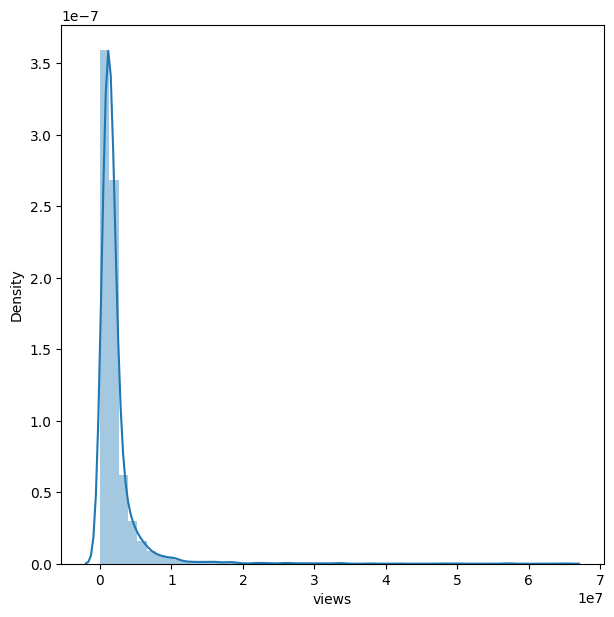

In [59]:
plt.figure(figsize=(7,7))
sns.distplot(df['views'])
plt.show()

The data available for views column is positively (right) skewed. 

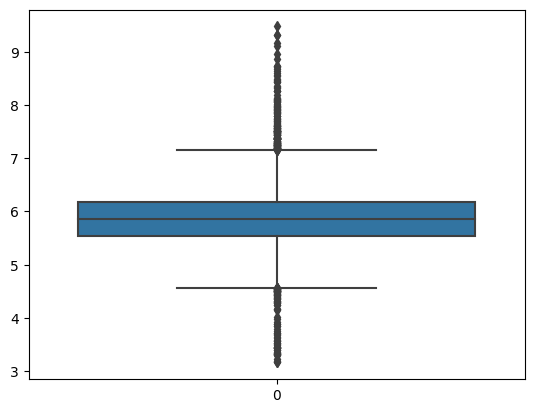

In [60]:
sns.boxplot(np.power(df['views'],1/8))
plt.show()

After null and outlier treatment for views no further obstacles can be observed from the boxplot with respect to the data

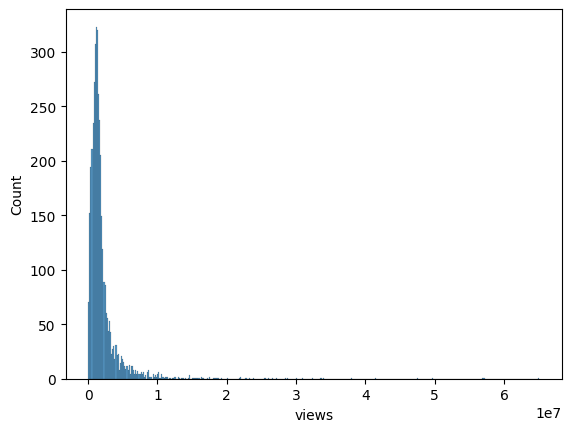

In [61]:
sns.histplot(df['views'])
plt.show()

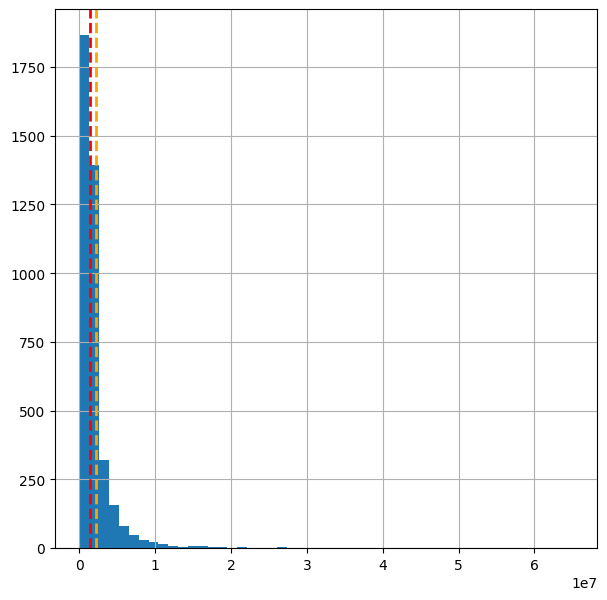

In [62]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
views = df['views'] 
views.hist(bins = 50,ax = ax)
ax.axvline(views.mean(), color='orange', linestyle='dashed', linewidth=2)
ax.axvline(views.median(), color='red', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the views column.

##### 2. What is/are the insight(s) found from the chart?

The distribution of views column is positively skewed. And after outlier removal no discrepencies can be found in the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The views being the dependent variable from the dataset, if formatted correctly and cleaned thoroughly can help in training the model with relative ease.

#### Plotting comments (int)

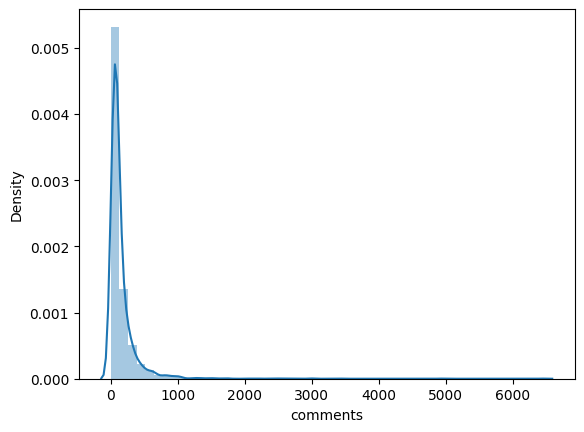

In [63]:
sns.distplot(df['comments'])
plt.show()

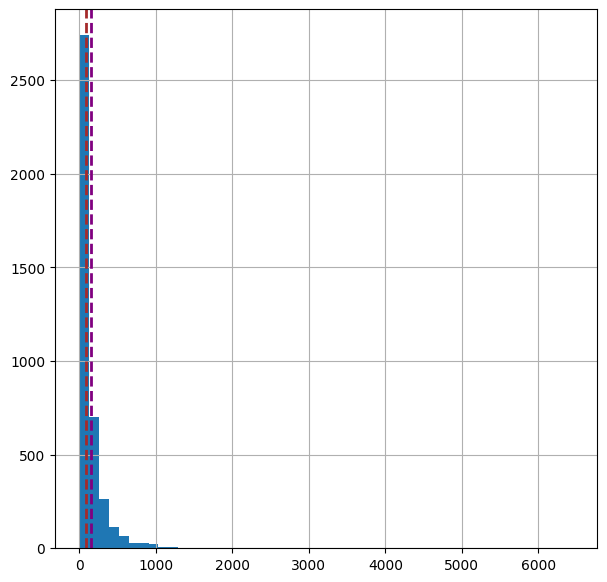

In [64]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
comments = df['comments'] 
comments.hist(bins = 50,ax = ax)
ax.axvline(comments.mean(), color='purple', linestyle='dashed', linewidth=2)
ax.axvline(comments.median(), color='brown', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To gain visual insights about the chart and draw heuristics from it for proceeding with the dataset analysis.

##### 2. What is/are the insight(s) found from the chart?

The comments variable is also positively skewed. The comments provided in low numbers occur most frequently and many of the sessions do not have any comments, i.e, 0 comments/ NaN values. And hene are treated with median replacement for the null values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The comments can be treated as one of the ways to depict the public feedback rearding the TED session. So the number of comments being higher can provide an impression that the video is engaging for most of the users, and hence can attract further increse in views, creating a sense of interest for the next viewer.

#### Plotting Duration (int)

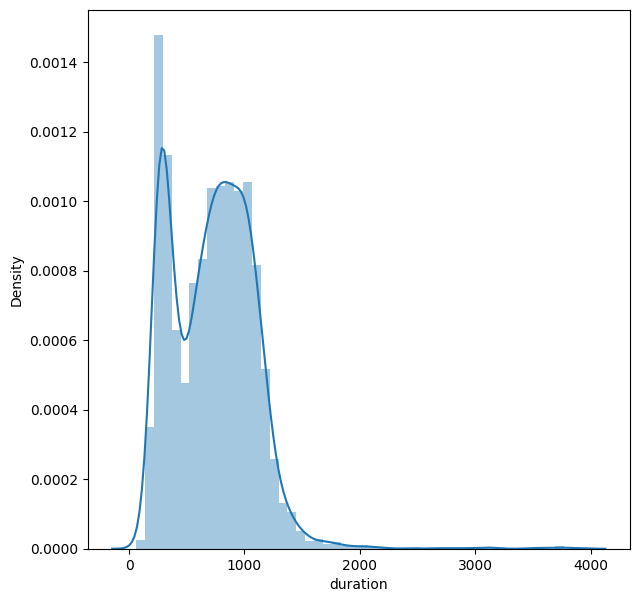

In [65]:
plt.figure(figsize=(7,7))
sns.distplot(df['duration'])
plt.show()

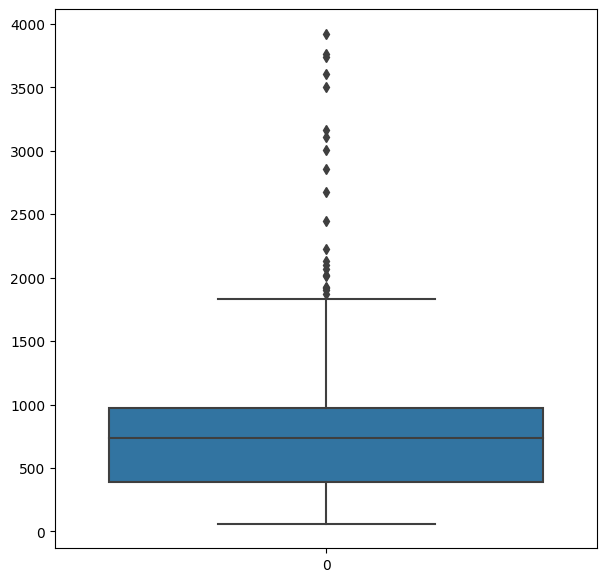

In [66]:
plt.figure(figsize=(7,7))
sns.boxplot(df['duration'])
plt.show()

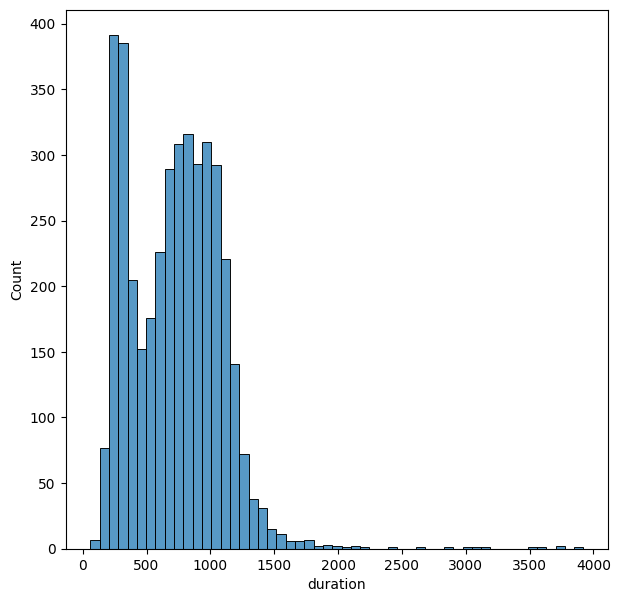

In [67]:
plt.figure(figsize=(7,7))
sns.histplot(df['duration'])
plt.show()

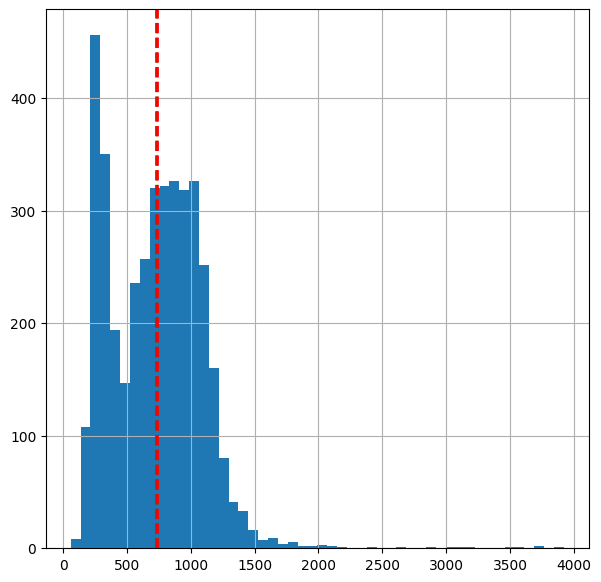

In [68]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
duration = df['duration'] 
duration.hist(bins = 50,ax = ax)
ax.axvline(duration.mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(duration.median(), color='red', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the duration of the sessions.

##### 2. What is/are the insight(s) found from the chart?

The count of TED sessions with high duration is very rare but not in a outlier state of existence, as we can see many variations of count through the visualizations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The ambiguous decision would be that longer session would attract more viewers or shorter session would. As from a layman perspective the shorter the session would be the more perferred by a viewer on average, and for some considerable perentage of viewers on the hand would prefer the sessions to be a bit longer. Yet the proportionality completely depends on the user preference here.

### BI-VARIATE ANALYSIS

#### Scatter plot numerical variables V/S views

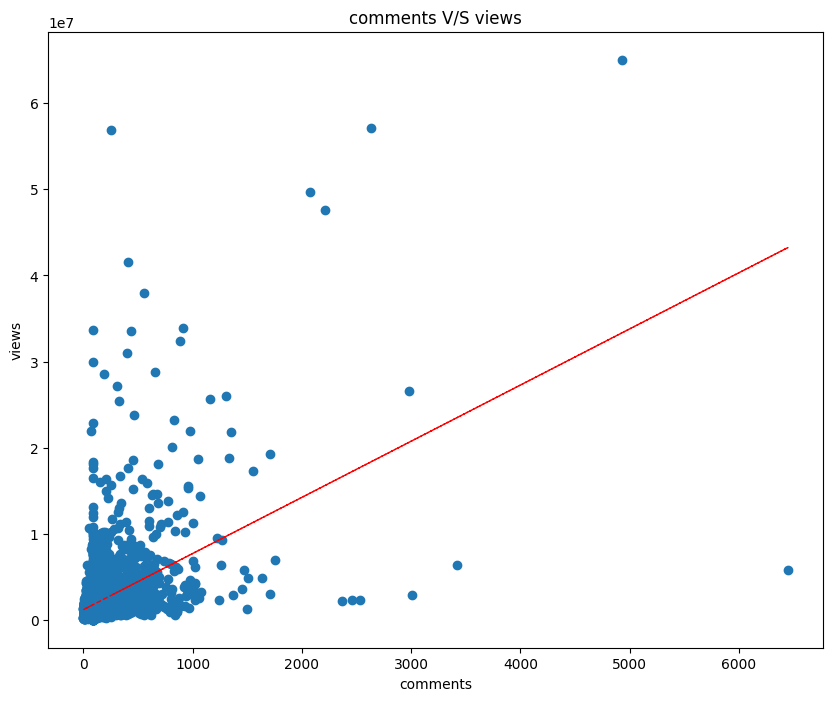

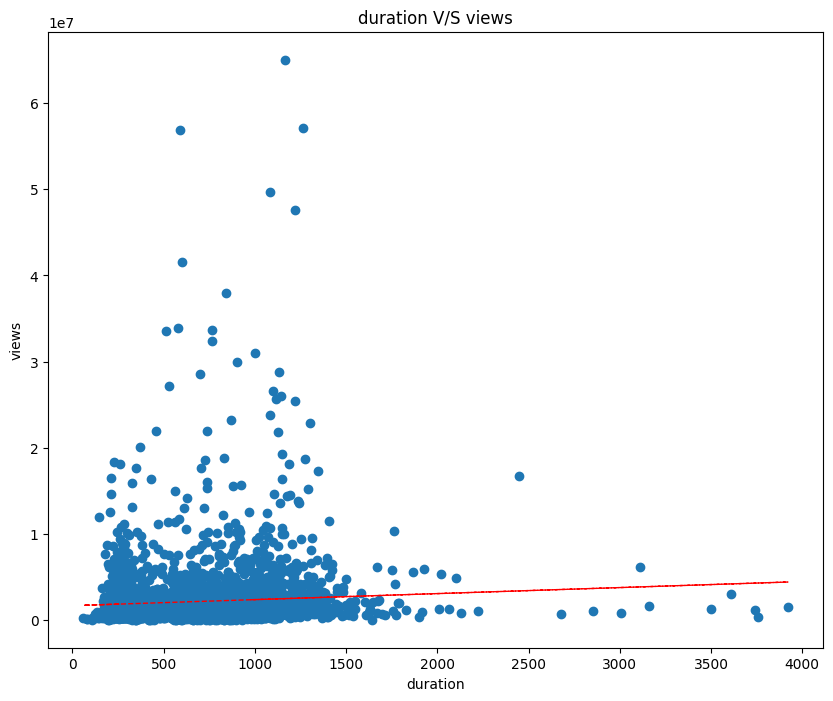

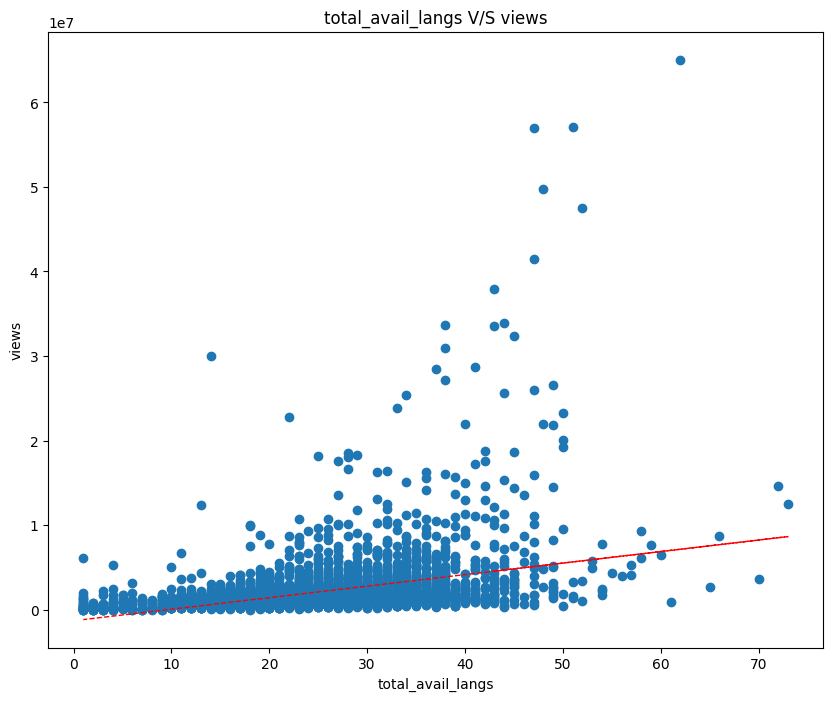

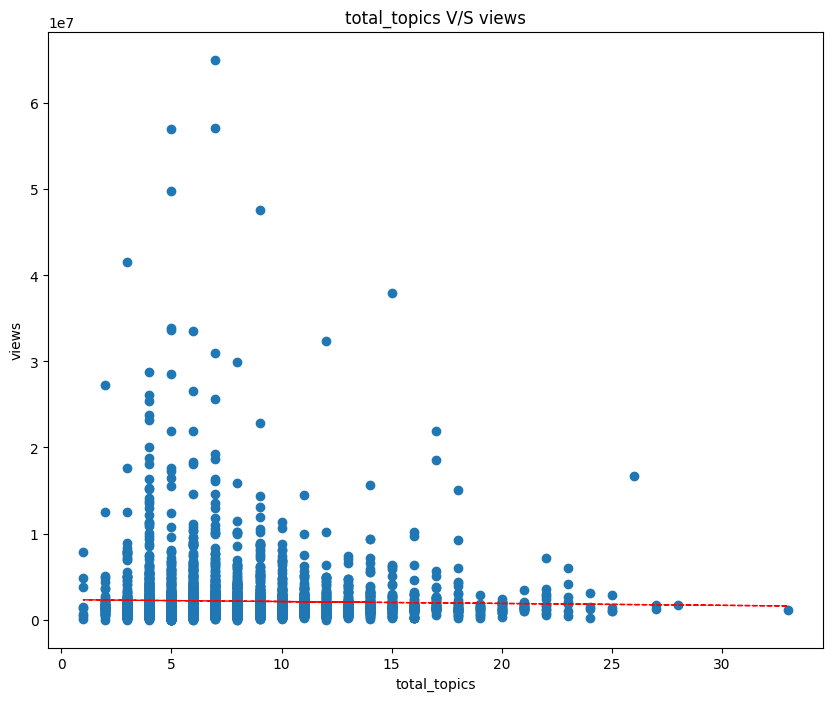

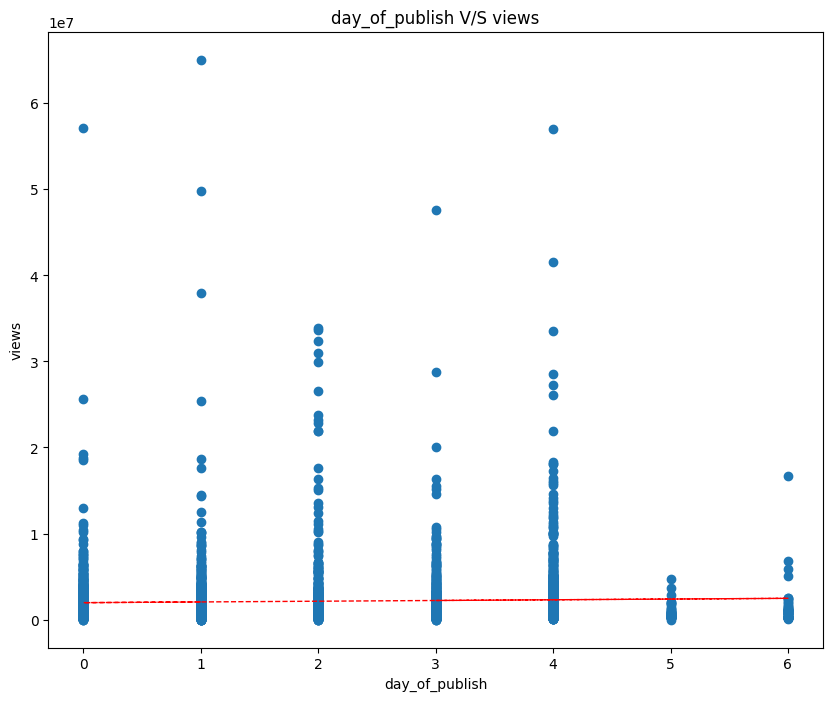

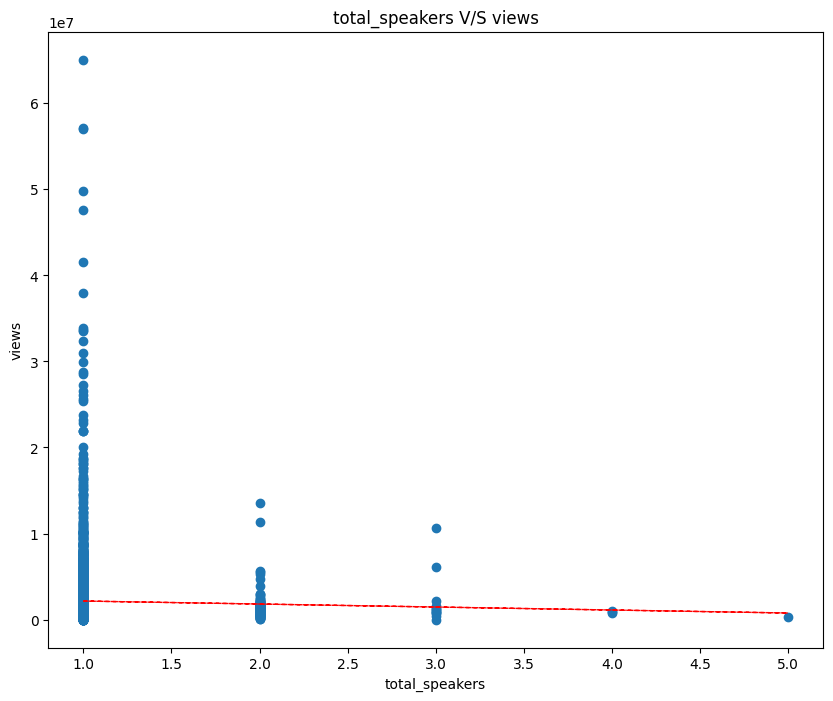

In [95]:
for var in df.describe().columns[2:]:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = df[var]
  plt.xlabel(var)
  plt.ylabel('views')
  ax.set_title(var+' V/S views')
  plt.scatter(x = feature, y = df['views'])
  lse = np.polyfit(df[var],df['views'],1)
  yh = np.poly1d(lse)(df[var])

  plt.plot(df[var],yh,'r--',lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the numerical variables v/s the views.

##### 2. What is/are the insight(s) found from the chart?

The views have relative correlation with the numerical variables.

#### Language V/S Views


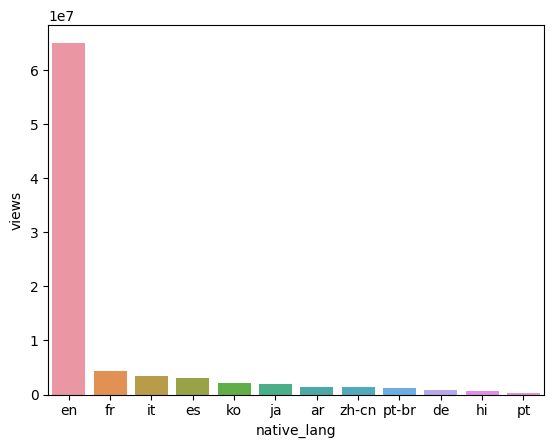

In [71]:
# langs vs views
lang_views = df.groupby(['native_lang'],as_index = False)['views'].max().sort_values('views',ascending = False)
sns.barplot(data = lang_views, x = 'native_lang', y = 'views')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Speaker V/S Views

In [72]:
print('Three are ',df['speaker_1'].nunique(),' speakers in the dataset of ',len(df['talk_id']))

Three are  3271  speakers in the dataset of  3997


In [73]:
# speakers vs views
# speaker_views = df[['speaker_1','views']].sort_values(by='views',ascending = False)
speaker_views = df.groupby(by = ['speaker_1'],as_index = False)['views'].mean().sort_values(by = 'views',ascending = False).rename(columns = {'speaker_1':'primary_speaker'})

In [74]:
# TOP 10 speakers with highest views average
top_speakers = speaker_views.iloc[:10]
top_speakers

,primary_speaker,views
172,Amy Cuddy,57074270.0
1380,James Veitch,39421820.5
3082,Tim Urban,37976820.0
486,Cameron Russell,33874546.0
2721,Sam Berns,33691484.0
2638,Robert Waldinger,32396714.0
2872,Simon Sinek,31330591.5
2064,Mary Roach,30977634.0
440,Brené Brown,30642988.5
1192,Graham Shaw,29953076.0


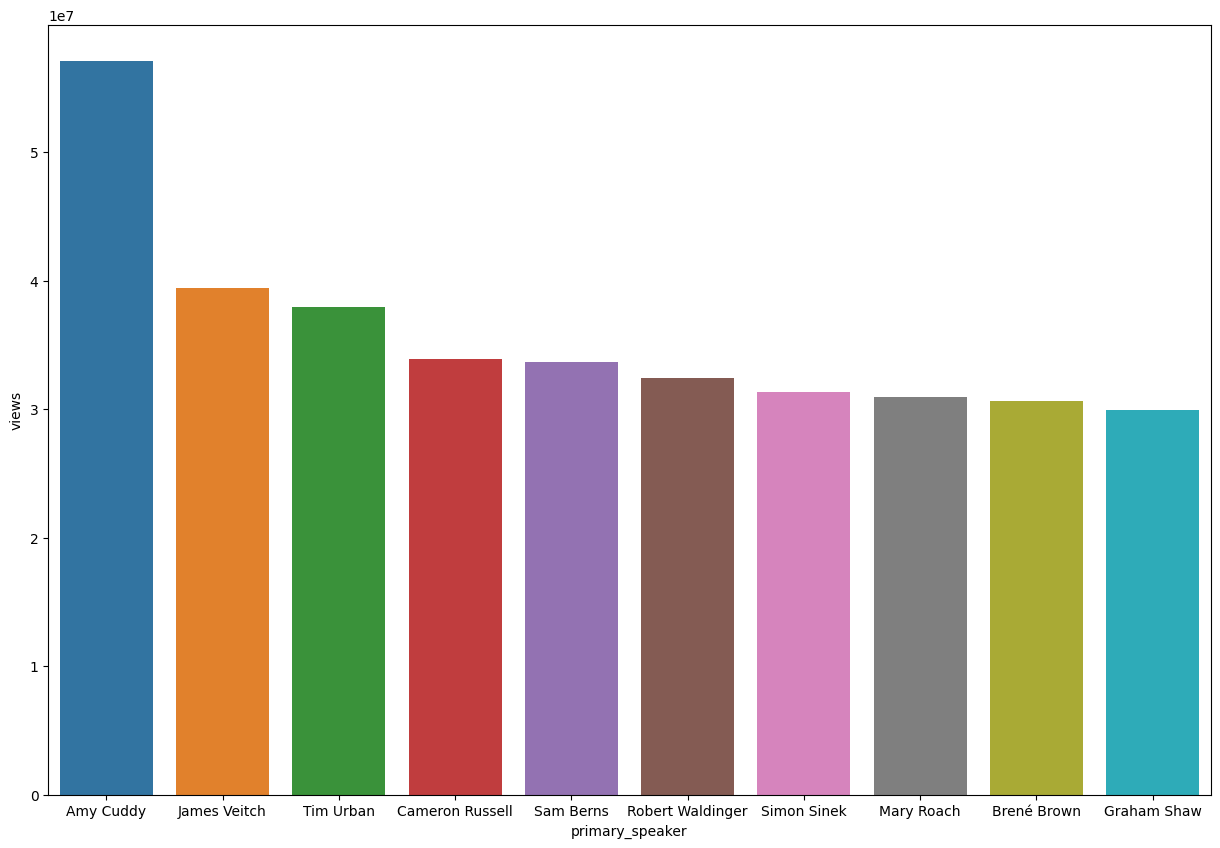

In [75]:
plt.figure(figsize = (15,10))
sns.barplot(data = top_speakers,x = 'primary_speaker',y='views')
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives information regarding the sessions with the highest average of views on the basis of primary speakers.

##### 2. What is/are the insight(s) found from the chart?

From the top 10 speakers of the dataset, the speaker with highest average of views are `Amy Cuddy`, `James Veitch` and, `Tim Urban`.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart here tells us that average views gained by a speaker and hence can help us identify the speaker with higher demand related to other speakers.

#### Speakers V/S Duration


In [76]:
speaker_duration = df.groupby('speaker_1',as_index = False)['duration'].mean().sort_values(by = 'duration', ascending = False).rename(columns = {'speaker_1':'primary_speaker'})

In [77]:
top_speaker_duration = speaker_duration.iloc[:5]

In [78]:
top_speaker_duration

,primary_speaker,duration
732,Danielle Allen,3007.0
2156,Michael Moschen,2222.0
1134,Gary Liu,2132.0
411,Bill Strickland,2128.0
936,Edward Snowden,2102.0


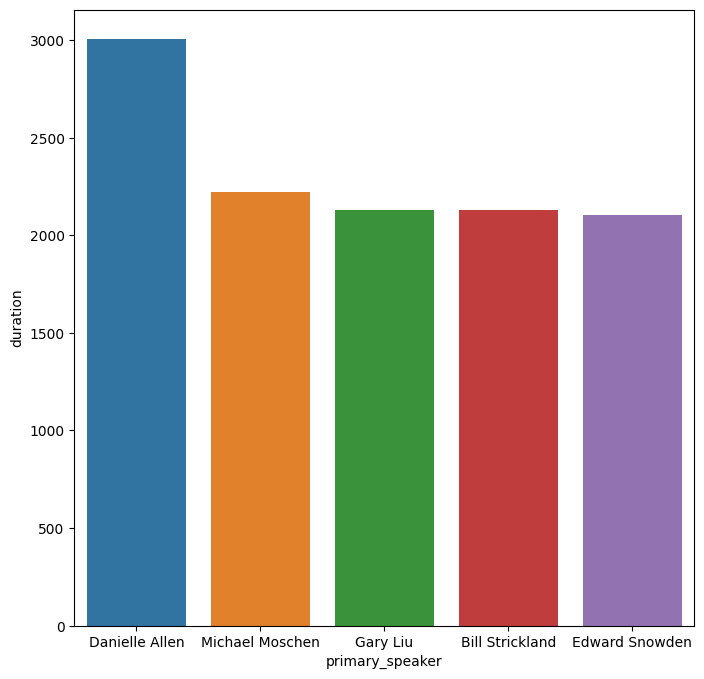

In [79]:
plt.figure(figsize = (8,8))
sns.barplot(data = top_speaker_duration, x = 'primary_speaker', y = 'duration')
plt.show()

##### 1. Why did you pick the specific chart?

To get information about the speakers with highest average duration.

##### 2. What is/are the insight(s) found from the chart?

The speakers with highest average duration of sessions among the top 5 are `Danielle Allen`, `Michael Moschen` and, `Gary Liu`.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The sessions with speakers who are capable of speaking more than the average speakers can be more informative for the audience and hence influence the viewers to expect videos of that speaker and the next sessions of the speaker can possibly get increment in the count of views.

#### Event V/S Views

In [80]:
event_views = df.groupby('event',as_index = False)['views'].mean().sort_values(by = 'views',ascending = False)
# plt.show()

In [81]:
top_event_views = event_views[:5]
top_event_views

,event,views
359,TEDxPuget Sound,49730580.0
272,TEDxHull,29953076.0
271,TEDxHouston,24433932.0
225,TEDxCreativeCoast,17609946.0
369,TEDxSF,13536004.5


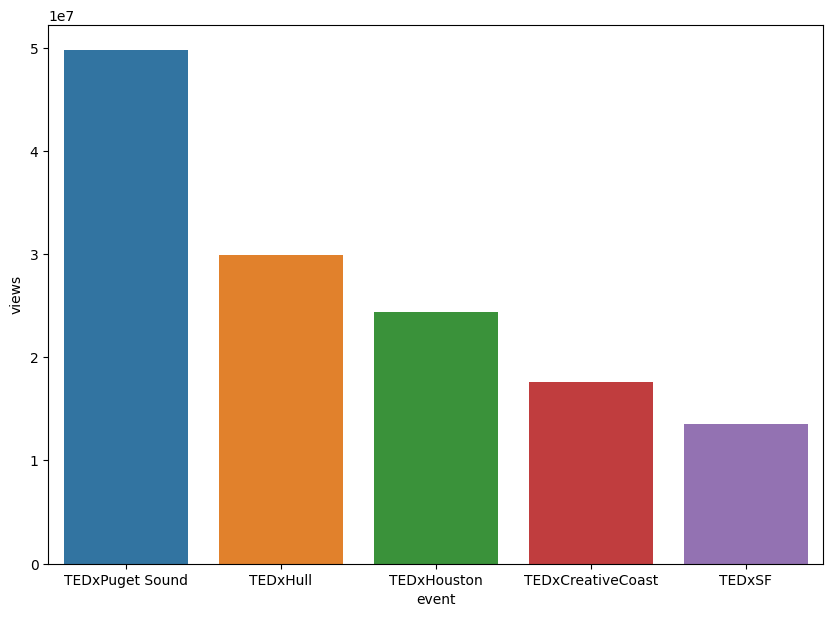

In [82]:
plt.figure(figsize = (10,7))
sns.barplot(data = top_event_views, x = 'event', y = 'views')
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in understanding the events with respect to their average views. Here we have the top 5 topics views with the highest average views.

##### 2. What is/are the insight(s) found from the chart?

Among the top 5 topics `TEDxPuget Sound` ,`TEDxHull` ,`TEDxHouston` have the highest average views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The events (venue) can be possibly a factor influencing the count of people arriving to actually attend the session. As the more number of people arrive to attend the session, the higher popularity of the speaker, leading to more number of views or rewatch count when published.

### MULTI-VARIATE ANALYSIS

#### CORRELATION and HEATMAP



#### Correlation Heatmap

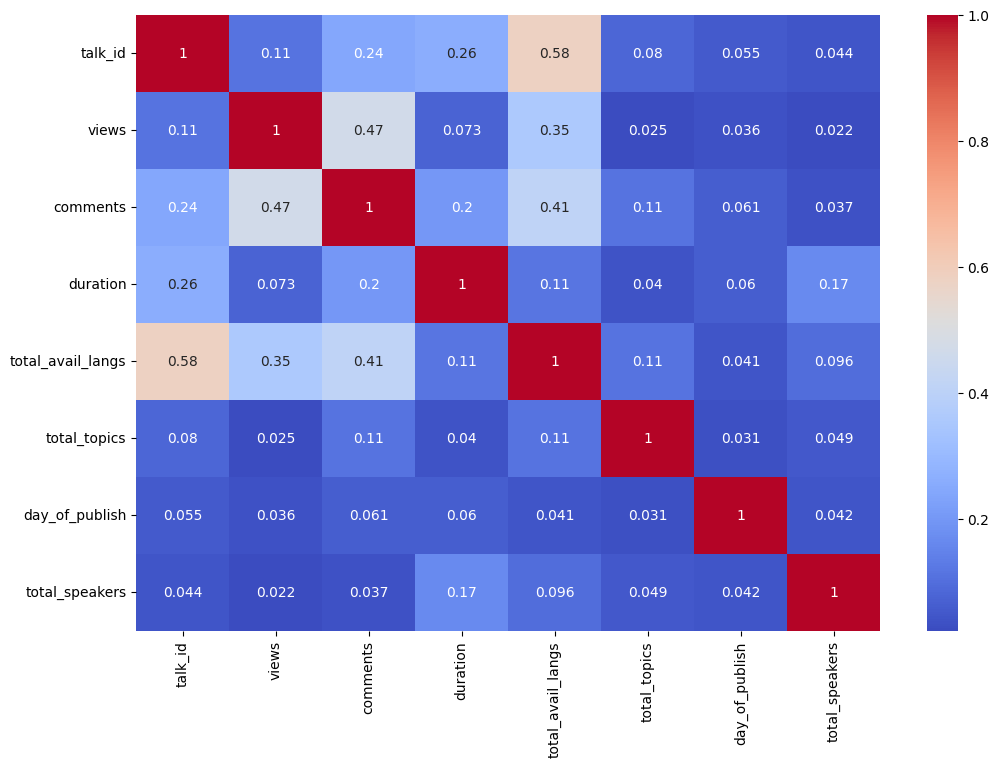

In [85]:
# Correlation Heatmap visualization code
plt.figure(figsize = (12,8))
sns.heatmap(abs(df.corr()),annot = True, cmap = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the correlation of the varaibles, specifically with respect to views.

##### 2. What is/are the insight(s) found from the chart?

The variables promoting multicollinearity need to be eliminated.

#### Chart - 15 - Pair Plot 

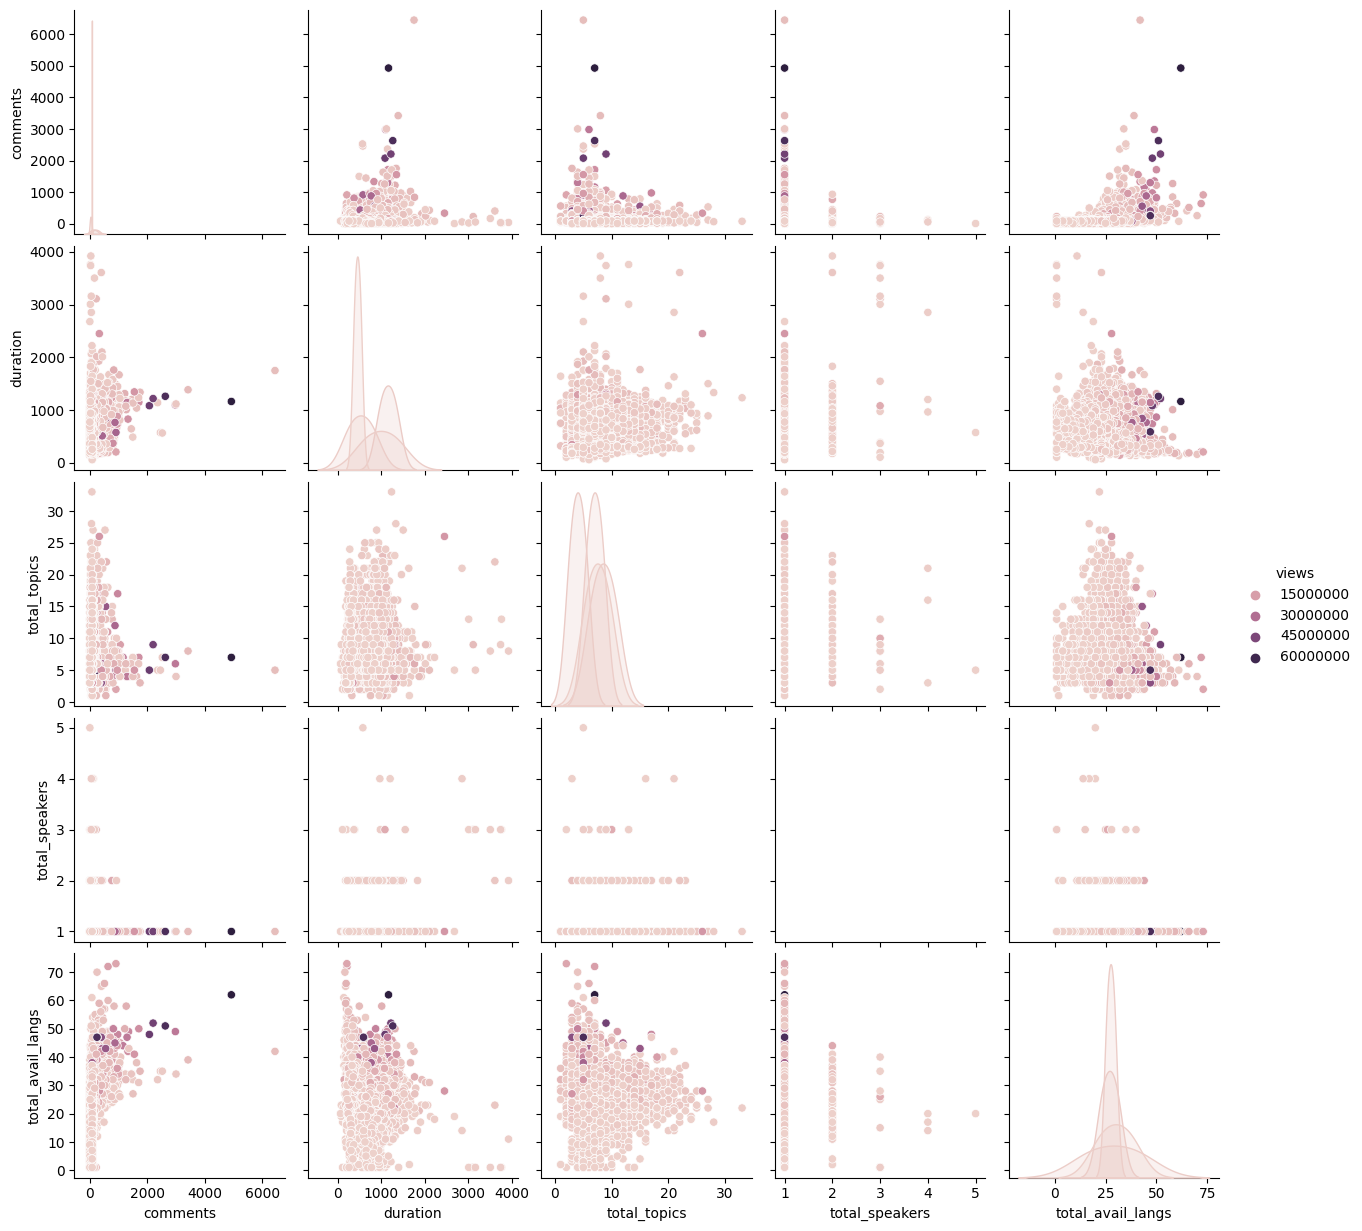

In [87]:
# Pair Plot visualization code
sns.pairplot(data = df[['comments','duration','total_topics','total_speakers','total_avail_langs','views']],hue = 'views')
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the relations between the numerica variables and views.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***Feature Engineering***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***